In this notebook we will be using most of the commands in the repository refrenced below in order to get YOLOv3 trained on our custom dataset


github repo: https://github.com/theAIGuysCode/YOLOv3-Cloud-Tutorial

# Helper functions

In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

# Cloning and Building Darknet
The following cells will clone darknet from AlexeyAB's famous repository, adjust the Makefile to enable OPENCV and GPU for darknet and then build darknet.


In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15420, done.
remote: Total 15420 (delta 0), reused 0 (delta 0), pack-reused 15420
Receiving objects: 100% (15420/15420), 14.05 MiB | 11.53 MiB/s, done.
Resolving deltas: 100% (10362/10362), done.


In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [ ]:
# make darknet (build)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

#Trying detections with Darknet and pretrained YOLOv3 on COCO datset

YOLOv3 has been trained already on the coco dataset which has 80 classes that it can predict. We will grab these pretrained weights so that we can run YOLOv3 on these pretrained classes and get detections.

In [1]:
# get yolov3 pretrained coco dataset weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2022-06-18 21:17:41--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  20.9MB/s    in 12s     

2022-06-18 21:17:54 (19.3 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [ ]:
# run darknet detection
!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  

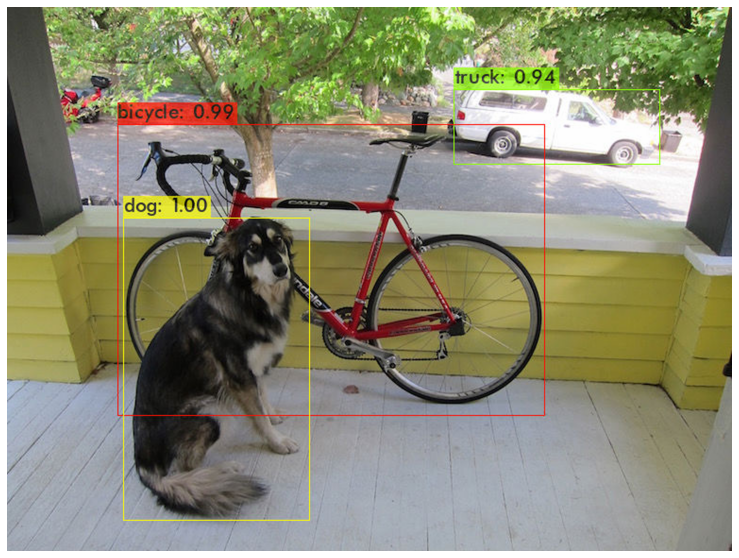

In [ ]:
# show image using our helper function
imShow('predictions.jpg')

Sweet! Looks like that was a success. Now it is time to train our own model.

# Mount Google Drive for easy access

first we mount google drive onto the notebook becuase we will be using it a lot for uploading and storing files

In [2]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/
Mounted at /content/gdrive


In [3]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive/yolov3

 backup
'Downloading Custom Dataset for Vehicle Detection.ipynb'
 generate_test.py
 generate_train.py
 images
 obj.data
 obj.names
 obj.zip
 presentation
 test.zip
'Training YOLOv3 on Custom Vehicle Dataset (subset from OpenImages).ipynb'
 yolov3_custom.cfg


In [ ]:
#cd back into darkent
%cd darknet

/content/darknet


#Now let's train our own model (where the fun begins)

##In order to train a custom YOLOv3 detector on the Darknet network we will need the following:

*   Labeled Custom Dataset
*   Custom .cfg file
*   obj.data and obj.names files
*   train.txt/test.txt file

In a seperate notebook (included in the project files as well) we downloaded a subset of images from Open Images Dataset by Google and zipped it and uploaded it on Google drive so that is what we will be using as our own custom labeled dataset

In [ ]:
# this is where my zip is stored
!ls /mydrive/yolov3

 backup
'Downloading Custom Dataset for Vehicle Detection.ipynb'
 generate_test.py
 generate_train.py
 images
 obj.data
 obj.names
 obj.zip
 presentation
 test.zip
'Training YOLOv3 on Custom Vehicle Dataset (subset from OpenImages).ipynb'
 yolov3_custom.cfg


In [ ]:
# copy the .zip files into the root directory of cloud VM
!cp /mydrive/yolov3/obj.zip ../
!cp /mydrive/yolov3/test.zip ../

In [ ]:
# unzip the zip files and its contents should now be in /darknet/data/obj and /darknet/data/test
!unzip ../obj.zip -d data/
!unzip ../test.zip -d data/

Streaming output truncated to the last 5000 lines.
  inflating: data/obj/cddbeb049d9191c5.jpg  
  inflating: data/obj/26fb1a3629500b51.jpg  
  inflating: data/obj/784e06a346eeabe5.jpg  
  inflating: data/obj/6dabb8c968de7efa.jpg  
  inflating: data/obj/b0ac8a707a70e6c3.txt  
  inflating: data/obj/c378dcbfb4298843.jpg  
  inflating: data/obj/ff9cf0da2a545751.jpg  
  inflating: data/obj/405fb77ad6c62d27.txt  
  inflating: data/obj/a06f1ca575b15b5e.jpg  
  inflating: data/obj/efdcc4b72bfd5c6e.txt  
  inflating: data/obj/681b5619e395f613.txt  
  inflating: data/obj/6e84ad0c4a1dad33.txt  
  inflating: data/obj/4d87f743cee970f5.jpg  
  inflating: data/obj/1a9ad01a0adfa179.jpg  
  inflating: data/obj/593d727efc671b37.jpg  
  inflating: data/obj/d1e53d9483e2e684.jpg  
  inflating: data/obj/0040be4d13e468e3.txt  
  inflating: data/obj/2db50c5683987f7c.txt  
  inflating: data/obj/e5fa3c0bb36fefac.jpg  
  inflating: data/obj/7b907ef99e10029f.txt  
  inflating: data/obj/2f7b26025eb95b7a.jpg  
  in

##Configuring Files for Training
This involves properly configuring custom .cfg file, obj.data, obj.names and train.txt file in the darknet framework


### i) Cfg File
We will copy the yolov3.cfg file into google drive and edit it to match with our custom dataset


In [ ]:
# download cfg to google drive and change its name
!cp cfg/yolov3.cfg /mydrive/yolov3/yolov3_custom.cfg

Now we will open the cfg file in google drive and edit it using any text editor then use it when we initiate the training

The changes we made is to set max_batches = 12000, steps = 9600, 10800, I changed the classes = 6 in the three YOLO layers and filters = 33 in the three convolutional layers before the YOLO layers.

In [ ]:
# upload the custom .cfg back to cloud VM from Google Drive
!cp /mydrive/yolov3/yolov3_custom.cfg ./cfg

###ii) obj.names and obj.data

Next we will create two new files in google drive. obj.names has all the classes names that we will be training our model on. and obj.data holds pointers our dataset as well as the path of the backup folder that we will use it for storing weights every a hundered iteration progress

In [ ]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /mydrive/yolov3/obj.names ./data
!cp /mydrive/yolov3/obj.data  ./data

### iii) Generating train.txt
The last configuration file needed before we can begin to train our custom detector is the train.txt file which hold the relative paths to all our training images. we will use a ready made script for this that we downloaded from the refrenced repo

In [ ]:
# upload the generate_train.py script to cloud VM from Google Drive
!cp /mydrive/yolov3/generate_train.py ./

In [ ]:
# upload the generate_test.py script to cloud VM from Google Drive
!cp /mydrive/yolov3/generate_test.py ./

Then we run the script that saved us days work in a few milliseconds

In [ ]:
!python generate_train.py
!python generate_test.py

In [ ]:
# verify train.txt can be seen in our darknet/data folder
!ls data/

9k.tree     giraffe.jpg		      labels		person.jpg  voc.names
coco9k.map  goal.txt		      obj		scream.jpg
coco.names  horses.jpg		      obj.data		test
dog.jpg     imagenet.labels.list      obj.names		test.txt
eagle.jpg   imagenet.shortnames.list  openimages.names	train.txt


## Download pre-trained weights for the convolutional layers.
So instead of training the model from scratch we will use the magic works of transfer learning and download pretrained weights for the convolutional layers of the YOLOv3 network and build off of it. By using these weights it helps our custom object detector to be way more accurate and not have to train as long. 


In [ ]:
# upload pretrained convolutional layer weights
!wget http://pjreddie.com/media/files/darknet53.conv.74

--2022-05-30 10:23:17--  http://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/darknet53.conv.74 [following]
--2022-05-30 10:23:17--  https://pjreddie.com/media/files/darknet53.conv.74
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M   107MB/s    in 1.5s    

2022-05-30 10:23:19 (107 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



P.S: This training could take several hours depending on how many iterations in the .cfg file. However, Colab Cloud Service kicks you off its VMs if you are idle for too long (30-90 mins).

To avoid this hold we will generate an automatic click every few minutes so we can let our model run when the pc is idle using the script below

```
function ClickConnect(){
console.log("Working"); 
document.querySelector("colab-toolbar-button#connect").click() 
}
setInterval(ClickConnect,60000)
```

##Let the training begin (Showtime!)
The time has finally come! We have everything in place now to train our custom YOLOv3 vehicle detector.

In [ ]:
# training our custom detector
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show

Streaming output truncated to the last 5000 lines.
 total_bbox = 181077, rewritten_bbox = 0.986321 % 
]2;1536/12000: loss=1.1 hours left=17.4
 1536: 1.081074, 0.967171 avg loss, 0.001000 rate, 6.186955 seconds, 98304 images, 17.378204 hours left
Loaded: 0.000080 seconds
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.826616), count: 5, class_loss = 1.032526, iou_loss = 0.177735, total_loss = 1.210261 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.055795, iou_loss = 0.000000, total_loss = 0.055795 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.214155), count: 1, class_loss = 0.561999, iou_loss = 0.478953, total_loss = 1.040953 
 total_bbox = 181083, rewritten_bbox = 0.986288 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.807863), count: 3, class_loss = 0.820104, iou_loss = 0.166366, total_loss = 0.986470 
v3 

Our training has stopped because the colab runtime session expired but luckily for us we saved the weights of each iteration and we will continue training using our backup weights

In [ ]:
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_last.weights -dont_show -map

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.768414), count: 4, class_loss = 1.045523, iou_loss = 0.255552, total_loss = 1.301075 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.001119, iou_loss = 0.000000, total_loss = 0.001119 
 total_bbox = 68805, rewritten_bbox = 1.050796 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.690482), count: 3, class_loss = 0.320862, iou_loss = 0.343066, total_loss = 0.663928 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.666620), count: 4, class_loss = 0.804786, iou_loss = 0.455193, total_loss = 1.259979 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.611442), count: 2, class_loss = 0.949764, iou_loss = 0.293153, total_loss = 1.242917 
 total_bbox = 68814, rewritten_bbox = 1.050658 % 
v3 (mse

During the training we realized that the validation label file was in a wrong format that is why the mAP scores were basically garbagy we we will modify the labels and continue training from our last backup point

In [ ]:
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_last.weights -dont_show -map

Streaming output truncated to the last 5000 lines.
 3265: 0.715000, 0.737783 avg loss, 0.001000 rate, 4.770143 seconds, 208960 images, 14.073153 hours left
Loaded: 0.000064 seconds
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.801386), count: 5, class_loss = 0.430999, iou_loss = 0.163105, total_loss = 0.594104 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.651894), count: 1, class_loss = 0.480860, iou_loss = 0.078487, total_loss = 0.559347 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.691774), count: 2, class_loss = 0.581928, iou_loss = 0.266580, total_loss = 0.848507 
 total_bbox = 125273, rewritten_bbox = 0.990636 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.818854), count: 5, class_loss = 0.494675, iou_loss = 0.140012, total_loss = 0.634687 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.706874), coun

for an unknown reason (while I was sleeping) training has stopped so I will restart it again from the last check point 

In [ ]:
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_last.weights -dont_show -map

Streaming output truncated to the last 5000 lines.
 total_bbox = 107748, rewritten_bbox = 0.974496 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.829201), count: 5, class_loss = 0.691431, iou_loss = 0.203120, total_loss = 0.894551 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.702567), count: 1, class_loss = 0.196479, iou_loss = 0.053571, total_loss = 0.250050 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000296, iou_loss = 0.000000, total_loss = 0.000296 
 total_bbox = 107754, rewritten_bbox = 0.974442 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.648315), count: 1, class_loss = 0.232954, iou_loss = 0.072591, total_loss = 0.305545 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.871546), count: 2, class_loss = 0.466212, iou_loss = 0.029118, total_loss = 0.495330 
v3 (ms

And hopefully restarting the training for the last time

In [ ]:
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_last.weights -dont_show -map

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.863348), count: 4, class_loss = 0.298541, iou_loss = 0.073165, total_loss = 0.371706 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.000547, iou_loss = 0.000000, total_loss = 0.000547 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000639, iou_loss = 0.000000, total_loss = 0.000639 
 total_bbox = 422357, rewritten_bbox = 1.017386 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.845143), count: 7, class_loss = 0.403096, iou_loss = 0.210684, total_loss = 0.613781 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.739479), count: 1, class_loss = 0.317098, iou_loss = 0.055108, total_loss = 0.372207 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.0

Restarting..

In [ ]:
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_last.weights -dont_show -map

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.919502), count: 3, class_loss = 0.031908, iou_loss = 0.016062, total_loss = 0.047970 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.827667), count: 2, class_loss = 0.010600, iou_loss = 0.175390, total_loss = 0.185990 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.816820), count: 1, class_loss = 0.586148, iou_loss = 0.018112, total_loss = 0.604260 
 total_bbox = 232422, rewritten_bbox = 1.043361 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.743098), count: 4, class_loss = 0.227675, iou_loss = 0.544567, total_loss = 0.772242 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.754413), count: 1, class_loss = 0.275331, iou_loss = 0.052644, total_loss = 0.327976 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.0

In [ ]:
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_last.weights -dont_show -map

Streaming output truncated to the last 5000 lines.
 total_bbox = 226511, rewritten_bbox = 1.018494 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.829482), count: 6, class_loss = 0.424059, iou_loss = 0.256555, total_loss = 0.680614 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.633394), count: 1, class_loss = 0.259445, iou_loss = 0.079363, total_loss = 0.338808 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.536101), count: 1, class_loss = 0.262893, iou_loss = 0.166584, total_loss = 0.429477 
 total_bbox = 226519, rewritten_bbox = 1.018458 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.823153), count: 3, class_loss = 0.233181, iou_loss = 0.090931, total_loss = 0.324113 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.879075), count: 1, class_loss = 0.012686, iou_loss = 0.006088, total_loss = 0.018774 
v3 (ms

In [ ]:
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_last.weights -dont_show -map

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.862241), count: 5, class_loss = 0.332273, iou_loss = 0.102323, total_loss = 0.434596 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.780563), count: 4, class_loss = 0.575012, iou_loss = 0.205505, total_loss = 0.780518 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000253, iou_loss = 0.000000, total_loss = 0.000253 
 total_bbox = 3178, rewritten_bbox = 0.723726 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.902808), count: 3, class_loss = 0.066597, iou_loss = 0.071193, total_loss = 0.137790 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.792270), count: 2, class_loss = 0.377746, iou_loss = 0.187357, total_loss = 0.565103 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00)

# Training Results:
After 12000 iterations as we determined for our model the training finished and we got the following results:


*   The current average loss went down around 0.3 (according to the model's authors website that is considered to be very good in case of custom datasets
*   The mAP (mean average precision, which is a very important metric in the field of object recognition) reached almost 72% which is high as it gets, considering that the original yolov3 model that was trained on the COCO dataset for days could only reach as high as 60% and that can be mostly attributed to the small number of classes that we are training on which is very suitable for our vehicle detection application




##mAP score on the validation dataset using our best weights

In [ ]:
!./darknet detector map  data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_last.weights

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5, 

# Test our vehicle Detector
We will first modify the cfg file and test our custom trained model on a few images that we downloaded on the drive

In [ ]:
# need to set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=1/batch=64/' yolov3_custom.cfg
!sed -i 's/subdivisions=1/subdivisions=16/' yolov3_custom.cfg
%cd ..

/content/darknet/cfg
/content/darknet


 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 166, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,

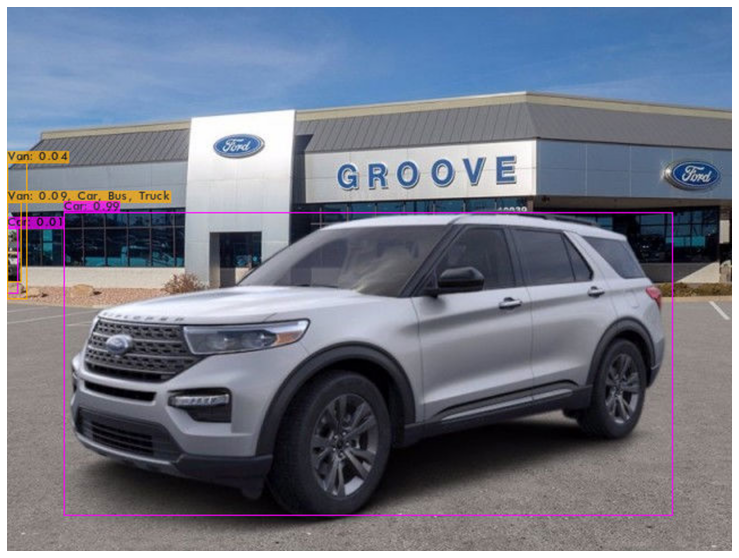

In [ ]:
# running the custom detector (thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_final.weights /mydrive/yolov3/images/car1.jpg -thresh 0.01
imShow('predictions.jpg')